<a href="https://colab.research.google.com/github/yotam-biu/tutorial10/blob/main/agent_based_exserises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Nested Lists and Basic Matrix Operations in Python

* 1. Create a list of 5 zeros

* 2. Update the 3rd element in the row from the value 0 to the value 1 (remember that indexing starts at 0)







* 3. Create a 5x5 matrix filled with zeros, using a nested list (lists inside a list)






* 4. Update the value in the 2nd row and 4th column to 1


* 5. Set all elements in the matrix to 1


* 6. Replace all values in the matrix with 0 or 1 based on a random condition:
If a random number (between 0 and 1) is less than 0.5, set the value to 1.
Otherwise, set it to 0.

* 7. Collect the values of the neighboring elements around the element located in the 2nd row and 4th column into a list.


* 8. Create an exact copy of the matrix and assign it to a new variable named "new_mat"


# Code Reading Pre-Assignment: Understand the Forest Grid Simulation

* Read the following code carefully and explain in your own words what the code does:

```python
# set up the grid
grid_size = 30
p_tree = 0.6  # probability that a cell contains a tree

grid = []
for _ in range(grid_size):
    grid = []
    for _ in range(grid_size):
        row.append(0) # Cell with no tree
    grid.append(row)

for i in range(grid_size):
    for j in range(grid_size):
        if random.random() < p_tree:
            grid[i][j] = 1 # Cell that contains a tree
grid[grid_size//2][grid_size//2] = 2 # One tree is initially on fire
```


Questions for Reflection:
1. What is the purpose of the variable p_tree?
2. How does the code decide whether a cell contains a tree or remains empty?
3. What is the significance of the value 2 assigned to the center of the grid?
4. How might this grid be used in a simulation?




Read the following function carefully and explain in your own words what it does.

```python
# define the rules for spreading the fire
def spread_fire(grid):

    # update_grid = [[grid[i][j] for j in range(grid_size)] for i in range(grid_size)]
    update_grid = copy.deepcopy(grid)
    for i in range(grid_size-1):
        for j in range(grid_size-1):
            if grid[i][j] == 1:
                neighbors = [grid[i-1][j],grid[i+1][j],grid[i][j-1],grid[i][j+1]]
                if 2 in neighbors:
                    update_grid[i][j] = 2

    return update_grid
```


Questions for Reflection:
1. What does the function spread_fire simulate?
2. What is the purpose of creating a copy of the grid (update_grid)?
3. How does the function decide whether a tree will catch fire?
4. What are the inputs and outputs of the function?
5. Why do the loops go up to grid_size - 1 rather than grid_size?

# Main Assignment: Spread Fire Simulation

In [ ]:

import random # for generate a random number
import copy # to create a copy in memory of an object

# for plots:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


The spread fire model is a simulation that represents the propagation of fire across a two-dimensional grid of cells. The model considers the status of each cell, which can be either "burning" or "unburned." The simulation proceeds in discrete time steps, during which the status of each cell is updated based on certain rules.

The code for the spread fire model typically involves the following steps:

* Initializing the grid: The two-dimensional grid is created and each cell is assigned an initial status (e.g., tree - randomly, and one cell on fire).

* Updating the status of each cell: For each time step, the status of each cell is updated based on a set of rules. In general, an unburned cell may ignite if one of its neighbors is burning.

* Visualizing the grid: The updated grid is typically visualized as an image or animation, which shows the progression of the fire over time..

The spread fire model can be used to study the behavior of fires under different conditions and to evaluate strategies for fire prevention and control.

In [ ]:
def initialize_forest(grid_size=30, p_tree=0.6):
    """Initialize a grid for the forest fire simulation."""
    # Build an empty grid
    grid = []
    for _ in range(grid_size):
        row = [0] * grid_size
        grid.append(row)

    # Assign trees randomly to the cells
    for i in range(grid_size):
        for j in range(grid_size):
            if random.random() < p_tree:
                grid[i][j] = 1

    # Set the center tree on fire
    grid[grid_size // 2][grid_size // 2] = 2

    return grid



In [ ]:
# define the rules for spreading the fire
def spread_fire(grid):
    """Update the forest grid based on fire spreading rules."""
    update_grid = copy.deepcopy(grid)
    for i in range(grid_size-1):
        for j in range(grid_size-1):
            if grid[i][j] == 1:
                neighbors = [grid[i-1][j],grid[i+1][j],grid[i][j-1],grid[i][j+1]]
                if 2 in neighbors:
                    update_grid[i][j] = 2

    return update_grid

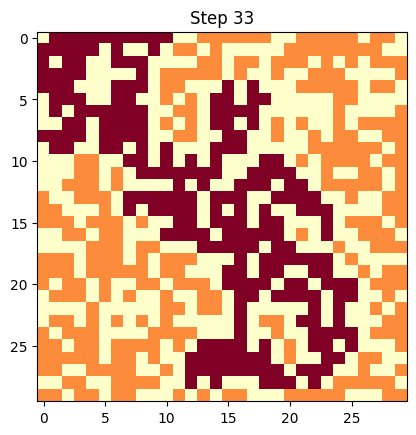

In [ ]:


# Set up the grid
grid_size = 30
p_tree = 0.6  # Probability that a cell contains a tree

grid = initialize_forest(grid_size, p_tree)

# run the simulation
fig, ax = plt.subplots()
for i in range(100):
    update_grid = spread_fire(grid)
    if update_grid == grid:
        break
    grid = update_grid
    ax.imshow(grid, cmap='YlOrRd', vmin=0, vmax=2)
    ax.set_title(f'Step {i}')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.01)

Please note that the cells on the right and bottom edges appear to be unexpectedly protected. Could you please update the code to account for these cells as well?